In [106]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
# from main import getHourlyGen, getHourlyLoad

CSO

In [2]:
df = pd.read_excel('data/Refrence/fca_obligations.xlsx', skiprows=0, index_col=None, sheet_name='FCA 14')
df = df.drop(['Intermittent', 'DR Type', 'Active/ Passive', 'Interface ID', 'Interface Name', 'Dispatch Zone ID', 'Dispatch Zone Name',
              'Lead Participant ID', 'Lead Participant Name', 'De-list Bid Type', 'De-list Bid MW', 'Status', 'Capacity Zone ID', 'Capacity Zone Name', 'Load Zone'], axis=1)
new_columns = pd.to_datetime(df.columns[-12:]).strftime('%B')
df.columns = df.columns[:-12].tolist() + new_columns.tolist()
df = df[df['Type'] == 'Generator']

In [24]:
# save df to csv
# df.to_csv('data/CSO2023.csv', index=False)

In [3]:
# df = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)

In [111]:
df.reset_index(drop=True, inplace=True)
df

,ID,Name,Type,Generating Fuel Type,State,Summer Qual,Winter Qual,FCA Qual,June,July,August,September,October,November,December,January,February,March,April,May
0,253,TURNKEY LANDFILL,Generator,Landfill Gas,NH,0.698,0.708,0.698,0.698,0.698,0.698,0.698,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.708
1,321,MANCHESTER 10 10A CC,Generator,Natural Gas,RI,157.000,170.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000
2,322,MANCHESTER 11 11A CC,Generator,Natural Gas,RI,157.000,170.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000
3,323,MANCHESTER 9 9A CC,Generator,Natural Gas,RI,154.000,169.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000
4,324,CDECCA,Generator,Natural Gas,CT,51.454,61.334,51.454,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,41476,MA_394_2 PV_205 STURBRIDGE RD_BRIMFIELD,Generator,Solar,MA,0.611,0.000,0.272,0.272,0.272,0.272,0.272,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
993,41477,Syncarpha Leicester - Battery,Generator,Solar,MA,2.600,2.600,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156
994,41494,Chester Solar Farm PV,Generator,Solar,VT,0.996,0.000,0.996,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
995,41496,Stonehill Solar PV,Generator,Solar,MA,0.922,0.000,0.922,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [112]:
# df[df['Type'] == 'Generator']['Generating Fuel Type'], 
df[df['Type'] == 'Generator']['July'].sum(),\
df[df['Type'] == 'Generator']['July'].sum(), \
    df[df['Type'] == 'Generator'][df['Generating Fuel Type']== 'Solar']['July'].sum(), \
    df[df['Type'] == 'Generator'][df['Generating Fuel Type']== 'Wind']['July'].sum(), \
    df[df['Type'] == 'Generator'][df['Generating Fuel Type']== 'Nuclear Uranium, Plutonium, Thorium']['July'].sum(), \
    df[df['Type'] == 'Generator'][df['Fuel Type'] == 'Coal']['July'].sum()

KeyError: 'Fuel Type'

In [114]:
# df2 = pd.read_excel('data/november_generator2023.xlsx', skiprows=0, index_col=0)
# df2 = df2[1:]
# df2.columns = df2.iloc[0]
# df2 = df2[1:]
# df_ISNE = df2.loc[df2['Balancing Authority Code'] == 'ISNE']

In [5]:
# fuelMappingDict = dict(zip(df_ISNE['Technology'].tolist(), df_ISNE['Energy Source Code'].tolist()))
# fuelMappingDict

In [115]:
from utilsData import getISO
from utilsData import fuelDict
dfISO, numGenerators, totalCap, totalCSO = getISO()

Total Capacity:  38389.70230400001 Number of Generators:  2585


In [116]:
# ?FIX THIS
def sina(x):
    # print(x)
    x = x.lower()
    if 'water' in x or 'hydro' in x:
        return 'WAT'
    elif 'wind' in x:
        return 'WND'
    elif 'waste' in x:
        return 'MSW'
    elif 'solar' in x:
        return 'SUN'
    elif 'biomass' in x or 'wood' in x:
        return 'WDS'
    elif 'gas' in x:
        return 'NG'
    elif 'coal' in x:
        return 'BIT'
    elif 'oil' in x or 'diesel' in x or 'jet' in x:
        return 'OIL'    
    elif 'nuclear' in x:
        return 'NUC'
    elif 'ker' in x:
        return 'KER'
    else:
        return 


In [118]:
fuels = df[['ID', 'Generating Fuel Type']]
fuels['Fuel Type'] = pd.Series()
for i in range(0, len(fuels['Fuel Type'])):
     a = dfISO[dfISO['ASSET ID'] == fuels.iloc[i]['ID']]['Fuel Type']
     if len(a) > 0:
          fuels['Fuel Type'][i] = a.to_list()[0]
     else:
          fuels['Fuel Type'][i] = sina(fuels['Generating Fuel Type'][i])

/tmp/ipykernel_15291/1635398450.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fuels['Fuel Type'] = pd.Series()
/tmp/ipykernel_15291/1635398450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuels['Fuel Type'] = pd.Series()
/tmp/ipykernel_15291/1635398450.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuels['Fuel Type'][i] = a.to_list()[0]
/tmp/ipykernel_15291/1635398450.py:8: SettingWithCopyWarning: 
A value is trying to be set on a

In [121]:
set(fuels['Fuel Type'])

{'Coal',
 'Gas',
 'Hydro',
 'KER',
 'MSW',
 'NG',
 None,
 'Nuclear',
 'OIL',
 'Oil',
 'Other',
 'SUN',
 'Solar',
 'WAT',
 'WND',
 'Waste',
 'Wind'}

In [66]:
fuels.to_csv('data/fuels.csv', index=False)

In [27]:
# fuels = df['Generating Fuel Type'].map(fuelMappingDict)

fuels = fuels.apply(lambda x: fuelDict[x] if x in fuelDict else 'Other')
fuels = fuels.fillna('Other')

-- 0         253
1         321
2         322
3         323
4         324
        ...  
1293    41476
1294    41477
1296    41494
1298    41496
1301    41514
Name: ID, Length: 997, dtype: int64
-- 0                              Landfill Gas
1                               Natural Gas
2                               Natural Gas
3                               Natural Gas
4                               Natural Gas
                       ...                 
1293                                  Solar
1294                                  Solar
1296                                  Solar
1298                                  Solar
1301    Electricity used for Energy Storage
Name: Generating Fuel Type, Length: 997, dtype: object


In [42]:
set(fuels)

{'Coal',
 'Gas',
 'Hydro',
 'Nuclear',
 'Oil',
 'Other',
 'Solar',
 'Waste',
 'Wind',
 'Wood'}

In [43]:

# fuels=='Other', (fuels=='Other').sum()

df.insert(3, 'Fuel Type', fuels)

In [44]:
df.to_csv('data/CSO2023.csv', index=False)

OTHERS

In [3]:
dfHourlyLoad = getHourlyLoad(ISO='ISNE', verbose=False)
dfHourlySolar, dfHourlyWind = getHourlyGen(ISO='ISNE', verbose=False)

NameError: name 'getHourlyLoad' is not defined

In [2]:
load = dfHourlyLoad['Total Load'].loc[:23]
dailyGen = 232803
sum(load), dailyGen, dailyGen - sum(load)

NameError: name 'dfHourlyLoad' is not defined

In [2]:
# df = pd.read_csv('data/genfuelmix_20230101.csv', skiprows=1)
# df.drop('H', inplace=True, axis=1)
# df.drop('Marginal Flag', inplace=True, axis=1)
# df.drop('Fuel Category Rollup', inplace=True, axis=1)
# df.dropna(inplace=True, axis=0)
# feulCategory = df['Fuel Category'].unique()
# feulCategory.sort()
# print(feulCategory)
# dfHourly = pd.DataFrame()
# date = df['Date'].iloc[0]
# j=0
# for i in range(len(df)):
#     if j == i:
#         time = df['Time'].iloc[i]
#         slice = df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)]
#         for fuel in feulCategory:
#             if fuel not in slice['Fuel Category'].values:
#                 entry = {'Date': date, 'Time': time, 'Fuel Category': fuel, 'Gen Mw': 0.0}
#                 slice.loc[len(slice.index)] = entry
#         slice = slice.sort_values('Fuel Category')
#         if dfHourly.empty:
#             dfHourly = slice
#         else:
#             dfHourly = pd.concat([dfHourly, slice], axis=0)
#         dfHourly.reset_index(drop=True, inplace=True)
        
#         print(df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)].index, time)
#         j = df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)].index[-1] + 1
#         print(j)


# dfHourly
# dfHourly.to_csv('data/genfuelmix_20230101_hourly_FIXED.csv', index=False)
    

In [3]:
# df = pd.read_csv('data/genfuelmix_20230101_hourly_FIXED.csv', skiprows=0)
# feulCategory = df['Fuel Category'].unique()


# # for i in range(len(df) // len(feulCategory)):
# #     slice = df.loc[i*len(feulCategory):(i+1)*len(feulCategory)-1]
# #     time = slice['Time'].iloc[0]
# #     hour, minute, second = map(int, time.split(':'))
# #     time = datetime(year, month, day, hour, minute, second)
# #     print(hour)
# #     print(slice)
# #     break

# for fuelType in feulCategory:
#     slice = df.loc[np.where(df['Fuel Category']==fuelType)]
#     hourlyGen = np.zeros(24)
#     oldTime = datetime(1, 1, 1, 0, 0, 0)
#     for i in range(len(slice)):
#         time = slice['Time'].iloc[i]
#         hour, minute, second = map(int, time.split(':'))
#         currentTime = datetime(1, 1, 1, hour, minute, second)
#         print(currentTime, oldTime)
#         delta = (currentTime - oldTime).seconds / 3600
#         # print(delta)
#         hourlyGen[hour] = slice['Gen Mw'].iloc[i] * delta
        
#         oldTime = currentTime
#     print(hourlyGen)
#     break

EIA Data for Generators

In [5]:
df = pd.read_excel('data/DailyGen2023.xlsx', skiprows=0, index_col=None, sheet_name='DAYGENBYFUEL')
# df.columns = df.iloc[0]
# df = df[1:]
df.index.stop

365

In [6]:
df = pd.read_excel('data/november_generator2023.xlsx', skiprows=0, index_col=0)
df = df[1:]
df.columns = df.iloc[0]
df = df[1:]
df_ISNE = df.loc[df['Balancing Authority Code'] == 'ISNE']

In [7]:
numGenerators = len(df_ISNE.index)
totalCap = sum(df_ISNE['Nameplate Capacity (MW)'].to_list())
totalCSO = 28660.0 #MWs from ISO-NE website
print('Total Capacity: ', totalCap, ', CSO: ', totalCSO, ', of CSO% : ', totalCSO/totalCap*100)

Total Capacity:  38183.99999999998 , CSO:  28660.0 , of CSO% :  75.05761575529021


In [13]:
len(df_ISNE[df_ISNE['Energy Source Code'] == 'WND']), len(df_ISNE[df_ISNE['Energy Source Code'] == 'SUN'])

(84, 746)

In [21]:
df_ISNE

Entity ID,Entity Name,Plant ID,Plant Name,Google Map,Bing Map,Plant State,County,Balancing Authority Code,Sector,Generator ID,...,Nameplate Energy Capacity (MWh),DC Net Capacity (MW),Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),Latitude,Longitude
Inventory of Operating Generators as of November 2023,,,,,,,,,,,,,,,,,,,,,
54895,FirstLight Power Resources Services LLC,539,Rocky River (CT),Map,Map,CT,Litchfield,ISNE,IPP Non-CHP,1,...,,,,,,,,,41.5826,-73.4349
54895,FirstLight Power Resources Services LLC,539,Rocky River (CT),Map,Map,CT,Litchfield,ISNE,IPP Non-CHP,2,...,,,,,,,,,41.5826,-73.4349
54895,FirstLight Power Resources Services LLC,539,Rocky River (CT),Map,Map,CT,Litchfield,ISNE,IPP Non-CHP,3,...,,,,,,,,,41.5826,-73.4349
22379,Connecticut Jet Power LLC,540,Branford,Map,Map,CT,New Haven,ISNE,IPP Non-CHP,UN10,...,,,,,,,,,41.2925,-72.7942
54895,FirstLight Power Resources Services LLC,541,Bulls Bridge,Map,Map,CT,Litchfield,ISNE,IPP Non-CHP,1,...,,,,,,,,,41.659046,-73.49198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65785,"Luminace Sunbeam Development Holdings, LLC",66876,Cenergy - Waterville,Map,Map,ME,Kennebec,ISNE,IPP Non-CHP,WAT,...,,,,,,,,,44.538719,-69.66888
65785,"Luminace Sunbeam Development Holdings, LLC",66878,Cenergy - Wiscasset,Map,Map,ME,Lincoln,ISNE,IPP Non-CHP,WIS,...,,,,,,,,,43.964548,-69.70476
65043,Madison Energy Investments LLC,66907,Barefoot Solar,Map,Map,ME,Somerset,ISNE,IPP Non-CHP,BARE1,...,,5.5,,,,,,,44.595751,-69.60503


In [20]:
sum(df_ISNE[df_ISNE['Energy Source Code'] == 'WND']['Nameplate Capacity (MW)'].to_list()), \
    sum(df_ISNE[df_ISNE['Energy Source Code'] == 'SUN']['Nameplate Capacity (MW)'].to_list()), \
        sum(df_ISNE['Nameplate Capacity (MW)'].to_list())

(1540.2, 2455.7000000000003, 38183.99999999998)

In [8]:
feulDict = {'BIT':'Coal', 'NG':'Gas', 'WAT':'Hydro', 'NUC':'Nuclear', \
        'DFO':'Oil', 'RFO':'Oil', 'JF':'Oil', 'KER':'Oil', \
        'MSW':'Waste', 'SUN':'Solar', 'WND':'Wind', 'WDS':'Wood'}
fuels = df_ISNE['Energy Source Code'].map(feulDict)
df_ISNE.inser(-1, 'Fuel', fuels)

AttributeError: 'DataFrame' object has no attribute 'inser'

In [4]:
isVRE = ['SUN', 'MWH', 'OBG', 'WND', 'BLQ']
isNotVRE = ['KER', 'NG', 'DFO', 'RFO', 'JF', 'WDS', 'BIT', 'WOO' , 'NUC', 'MSW', 'WAT']
df_ISNE['isVRE'] = np.where(df_ISNE['Energy Source Code'].isin(isVRE), 1, 0)

/tmp/ipykernel_27817/2647040716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ISNE['isVRE'] = np.where(df_ISNE['Energy Source Code'].isin(isVRE), 1, 0)


- Add FOR based on GADS

PFP

In [5]:
class GenCo:
    def __init__(self, MaxCap, CapObl, isVRE=False, FOR=0.1):
        self.MaxCap = MaxCap
        self.CapObl = CapObl
        self.isVRE = isVRE
        self.FOR = FOR
        self.deficit = False

    def currentCap(self, weatherCoef=1):
        self.availableCap = self.MaxCap * weatherCoef * np.random.choice(2, 1, p=[self.FOR, 1-self.FOR])
        if self.availableCap < self.CapObl:
            self.deficit = True
        # if self.isVRE:
        #     print('VRE: ', self.availableCap, ', ', self.CapObl, ', ', self.deficit)
        #     raise
        self.participateCap = np.minimum(self.availableCap, self.CapObl)

def getGenCos(numGen, df=None):
    genCos = []
    if df is None:
        MaxCaps = np.random.randint(low=5, high=100, size=(numGen)) * 1000
        isVREs = np.random.choice(2, 1, size=(numGen))
    else:
        MaxCaps = df['Nameplate Capacity (MW)'].to_list() * 1000
        isVREs = df['isVRE'].to_list()

    derateCnt = {0: 1.00, 
                1: 0.20}
    deratedCap = [MaxCaps[i] * derateCnt[isVREs[i]] for i in range(numGen)]
    totalDeratedCap = sum(deratedCap)
    obligations = deratedCap * np.array(totalCSO)/np.array(totalDeratedCap)
    # print('Total derated capacity: ', totalDeratedCap, ', Total obligations: ', sum(obligations))

    for i in range(numGen):
        MaxCap = MaxCaps[i]
        isVRE = isVREs[i]
        obligation = obligations[i]
        if isVRE:
            FOR = np.min([1, np.max([0, np.random.exponential(0.05)])])
        else:
            FOR = np.min([1, np.max([0, np.random.exponential(0.10)])])
        
        genCos.append(GenCo(MaxCap, obligation, isVRE, FOR))
    return np.array(genCos)


class Market:
    def __init__(self, numGen):
        self.numGen = numGen

    def getCurrentCap(self, genCos):
        currentCapSum = 0.
        for gen in genCos:
            weatherCoef = 1.
            if gen.isVRE:
                weatherCoef = np.random.uniform(0.8, 1)
            gen.currentCap(weatherCoef)
            currentCapSum += gen.participateCap
        return currentCapSum

    def getObligations(self, genCos):
        obligationsSum = 0
        for gen in genCos:
            obligationsSum += gen.CapObl
        return obligationsSum
    
    def sortGenCos(self, genCos):
        # np.random.shuffle(genCos)
        return genCos


class PFP:
    def __init__(self, gencos=[], PRR=3.5, BPR=5.0):
        self.genCos = gencos
        #PRR is 3.5 K$ / MWh
        self.PRR = PRR
        # BPR is 5 K$/MW-month
        self.BPR = BPR

    def calcPFP(self, balancingRatio=1.0):
        perfScores = []
        for genCo in self.genCos:
            perfScores.append(genCo.participateCap - balancingRatio * genCo.CapObl)
        perfScores = np.array(perfScores)
        return perfScores * self.PRR

In [6]:
def test(numGen=100, genCos=[], verbose=False):
    market = Market(numGen)
    currentCapSum = market.getCurrentCap(genCos)
    obligationsSum = market.getObligations(genCos)
    if verbose:
        print('currentCapSum: ', currentCapSum, ', obligationsSum: ', obligationsSum)
    if currentCapSum < obligationsSum:
        genCos = market.sortGenCos(genCos)
        for gen in genCos:
            if not gen.deficit:
                tmp = np.minimum(obligationsSum - currentCapSum, gen.availableCap - gen.participateCap)
                currentCapSum +=  tmp
                gen.participateCap += tmp
            if np.allclose(currentCapSum, obligationsSum):
                break
        if not np.allclose(currentCapSum, obligationsSum):
            print('Outage!')
            return None
        pfp = PFP(genCos)
        payments = pfp.calcPFP()
        
    payments = np.array(payments)
    return payments


In [7]:
numGen = numGenerators
genCos = getGenCos(numGen, df_ISNE)
payments = []
while True:
    for gen in genCos:
        gen.deficit = False
    pay = test(numGen, genCos)
    if pay is not None:
        payments.append(pay)
        if len(payments) == 356 * 24:
            break
payments = np.array(payments)
payments = payments.reshape(payments.shape[0], -1)

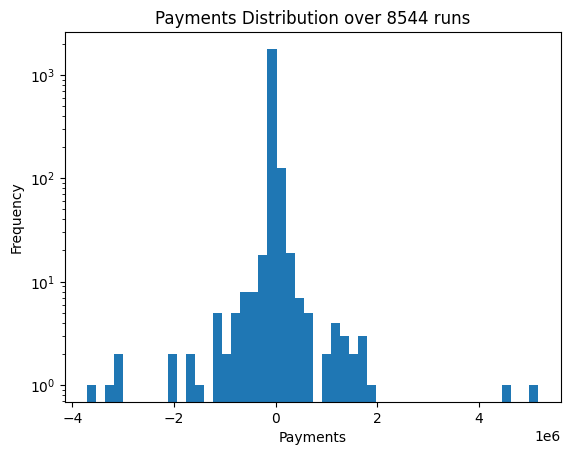

In [8]:
plt.hist(payments.sum(axis=0), bins=50)
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Payments Distribution over {} runs'.format(len(payments)))
plt.show()

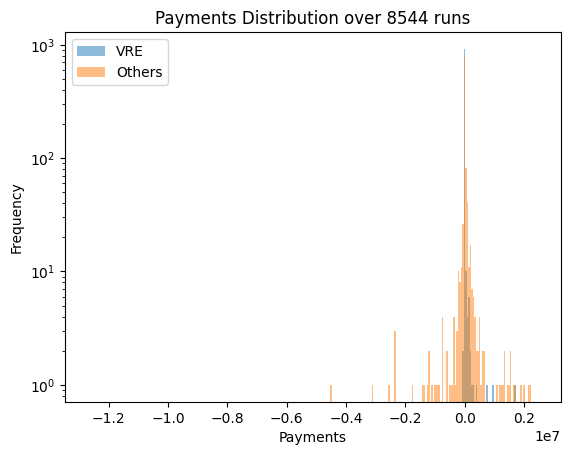

In [27]:
bins=np.arange(payments.sum(0).min(), payments.sum(0).max(), 50000)
VREslice, nonVREslice = [], []
for i in range(numGen):
    if genCos[i].isVRE:
        VREslice.append(i)
    else:
        nonVREslice.append(i)
plt.hist(payments[:, VREslice].sum(axis=0), bins=bins, alpha=0.5, label='VRE')
plt.hist(payments[:, nonVREslice].sum(axis=0), bins=bins, alpha=0.5, label='Others')
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Payments Distribution over {} runs'.format(len(payments)))
plt.legend()
plt.show()

In [28]:
payments[:, VREslice].sum(), payments[:, nonVREslice].sum()

(5901182.25787475, -5901415.039388371)

In [8]:
ISO = 'ISNE'
fuelDict = {'BIT':'Coal', 'NG':'Gas', 'WAT':'Hydro', 'NUC':'Nuclear', \
                'DFO':'Oil', 'RFO':'Oil', 'JF':'Oil', 'KER':'Oil', \
                'MSW':'Waste', 'SUN':'Solar', 'WND':'Wind', 'WDS':'Wood'}

In [9]:
df = pd.read_excel('data/november_generator2023.xlsx', skiprows=0, index_col=0)
df = df[1:]
df.columns = df.iloc[0]
df = df[1:]
dfISO = df.loc[df['Balancing Authority Code'] == ISO]

numGenerators = len(dfISO.index)
totalCap = sum(dfISO['Nameplate Capacity (MW)'].to_list())
totalCSO = 28660.0 #MWs from ISO-NE website

fuels = dfISO['Energy Source Code'].map(fuelDict)
fuels = fuels.fillna('Other')
dfISO.insert(3, 'Fuel Type', fuels)
print('Total Capacity: ', totalCap, ', CSO: ', totalCSO, ', of CSO% : ', totalCSO/totalCap*100)

Total Capacity:  38183.99999999998 , CSO:  28660.0 , of CSO% :  75.05761575529021


In [11]:
# dfISO.to_csv('data/ISNEGEN23.csv', index=False)

In [3]:
import pandas as pd

In [5]:
df = pd.read_excel('data/2023_celt_report.xlsx', skiprows=13, index_col=None, sheet_name='2.1 Generator List')
df2 = df[['ASSET ID', 'ASSET NAME', 'RESOURCE ID', 'RESOURCE NAME',
       'GENERATOR TYPE', 'PRIM FUEL TYPE', 'ALT FUEL TYPE', 'EIA PLANT NUMBER', 'NAMEPLATE\n(MW)']]
df2.rename(columns={"NAMEPLATE\n(MW)": "Nameplate Capacity (MW)", "PRIM FUEL TYPE": "Primary Fuel Type"}, inplace=True)

/tmp/ipykernel_13517/1976791192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={"NAMEPLATE\n(MW)": "Nameplate Capacity (MW)", "PRIM FUEL TYPE": "Primary Fuel Type"}, inplace=True)


In [6]:
df2

,ASSET ID,ASSET NAME,RESOURCE ID,RESOURCE NAME,GENERATOR TYPE,Primary Fuel Type,ALT FUEL TYPE,EIA PLANT NUMBER,Nameplate Capacity (MW)
0,253,TURNKEY LANDFILL,253.0,TURNKEY LANDFILL,INTERNAL COMBUSTION,LFG,NaN,54663,3.0000
1,321,MANCHESTER 10/10A CC,321.0,MANCHESTER 10 10A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
2,322,MANCHESTER 11/11A CC,322.0,MANCHESTER 11 11A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
3,323,MANCHESTER 9/9A CC,323.0,MANCHESTER 9 9A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
4,326,ALTRESCO,326.0,ALTRESCO,COMBINED CYCLE,NG,DFO,50002,160.0880
...,...,...,...,...,...,...,...,...,...
2580,73793,GREEN02703SOLAR1080QF,NaN,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,1.0800
2581,73796,MELROSESCH02835SOLAR150NM,NaN,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1500
2582,73804,OSJLHOPEVLY02898SOLAR199RE,NaN,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1990
2583,73805,PARSON01581SOLAR150QF,NaN,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1500


In [12]:
df2.to_csv('data/CELT2023.csv', index=False)

In [13]:
fuelDict = {'LFG': 'Gas', 'NG': 'Gas', 'DFO': 'Gas', 'KER': 'Gas',\
            'WDS':'Waste', 'BIT':'Coal', 'MSW' : 'Waste', \
            'JF':'Oil', 'RFO' : 'Oil',
            'WAT':'Hydro', 'NUC':'Nuclear', 'WND':'Wind', 'SUN':'Solar',\
            'OBG': 'Other', 'MWH': 'Other'}

In [14]:
# fuelDict = {'BIT':'Coal', 'NG':'Gas', 'WAT':'Hydro', 'NUC':'Nuclear', \
#                 'DFO':'Oil', 'RFO':'Oil', 'JF':'Oil', 'KER':'Oil', \
#                 'MSW':'Waste', 'SUN':'Solar', 'WND':'Wind', 'WDS':'Wood'}

In [16]:
dfISO = pd.read_csv('data/CELT2023.csv')

numGenerators = len(dfISO.index)
totalCap = sum(dfISO['Nameplate Capacity (MW)'].to_list())
totalCSO = 28660.0 #MWs from ISO-NE website

fuels = dfISO['Primary Fuel Type'].map(fuelDict)
fuels = fuels.fillna('Other')
dfISO.insert(3, 'Fuel Type', fuels)
print('Total Capacity: ', totalCap, 'Number of Generators: ', numGenerators)

Total Capacity:  38389.70230400001 Number of Generators:  2585


In [17]:
dfISO

,ASSET ID,ASSET NAME,RESOURCE ID,Fuel Type,RESOURCE NAME,GENERATOR TYPE,Primary Fuel Type,ALT FUEL TYPE,EIA PLANT NUMBER,Nameplate Capacity (MW)
0,253,TURNKEY LANDFILL,253.0,Gas,TURNKEY LANDFILL,INTERNAL COMBUSTION,LFG,NaN,54663,3.0000
1,321,MANCHESTER 10/10A CC,321.0,Gas,MANCHESTER 10 10A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
2,322,MANCHESTER 11/11A CC,322.0,Gas,MANCHESTER 11 11A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
3,323,MANCHESTER 9/9A CC,323.0,Gas,MANCHESTER 9 9A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
4,326,ALTRESCO,326.0,Gas,ALTRESCO,COMBINED CYCLE,NG,DFO,50002,160.0880
...,...,...,...,...,...,...,...,...,...,...
2580,73793,GREEN02703SOLAR1080QF,NaN,Solar,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,1.0800
2581,73796,MELROSESCH02835SOLAR150NM,NaN,Solar,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1500
2582,73804,OSJLHOPEVLY02898SOLAR199RE,NaN,Solar,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1990
2583,73805,PARSON01581SOLAR150QF,NaN,Solar,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1500
